# 🔥 Calories Burned Prediction using XGBoost

This project predicts the number of calories burned during physical activity using physiological and workout-related features. The model is trained on a dataset of 15,000 entries and achieves high accuracy using the XGBoost regression algorithm.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## 📁 Dataset Overview

The dataset is a combination of two CSV files:

- `calories.csv`: Contains User_ID and Calories burned
- `exercise.csv`: Contains user demographics and exercise metrics

In [88]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [89]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [90]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [91]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [92]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [93]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [94]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [95]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [96]:
# checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [97]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000



## 📊 Exploratory Data Analysis (EDA)

- No missing values in the dataset
- All features are numerical (Gender encoded)
- Distribution plots, correlation heatmap, and summary statistics provided insights
- Strong correlation observed between `Duration`, `Heart Rate`, `Body Temp` and `Calories`

            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     

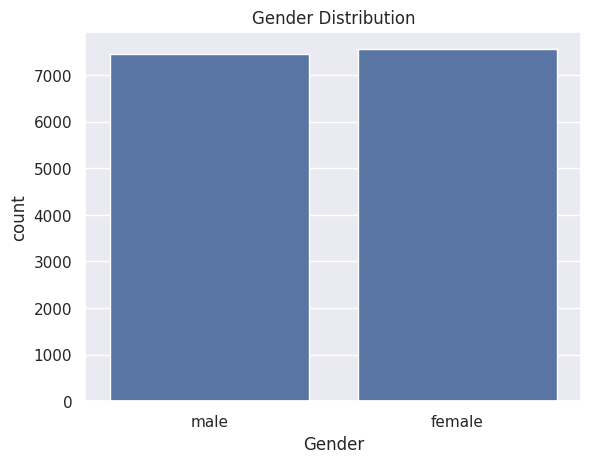

In [98]:
# Summary statistics
print(calories_data.describe())

# Countplot for Gender
sns.countplot(data=calories_data, x='Gender')
plt.title("Gender Distribution")
plt.show()


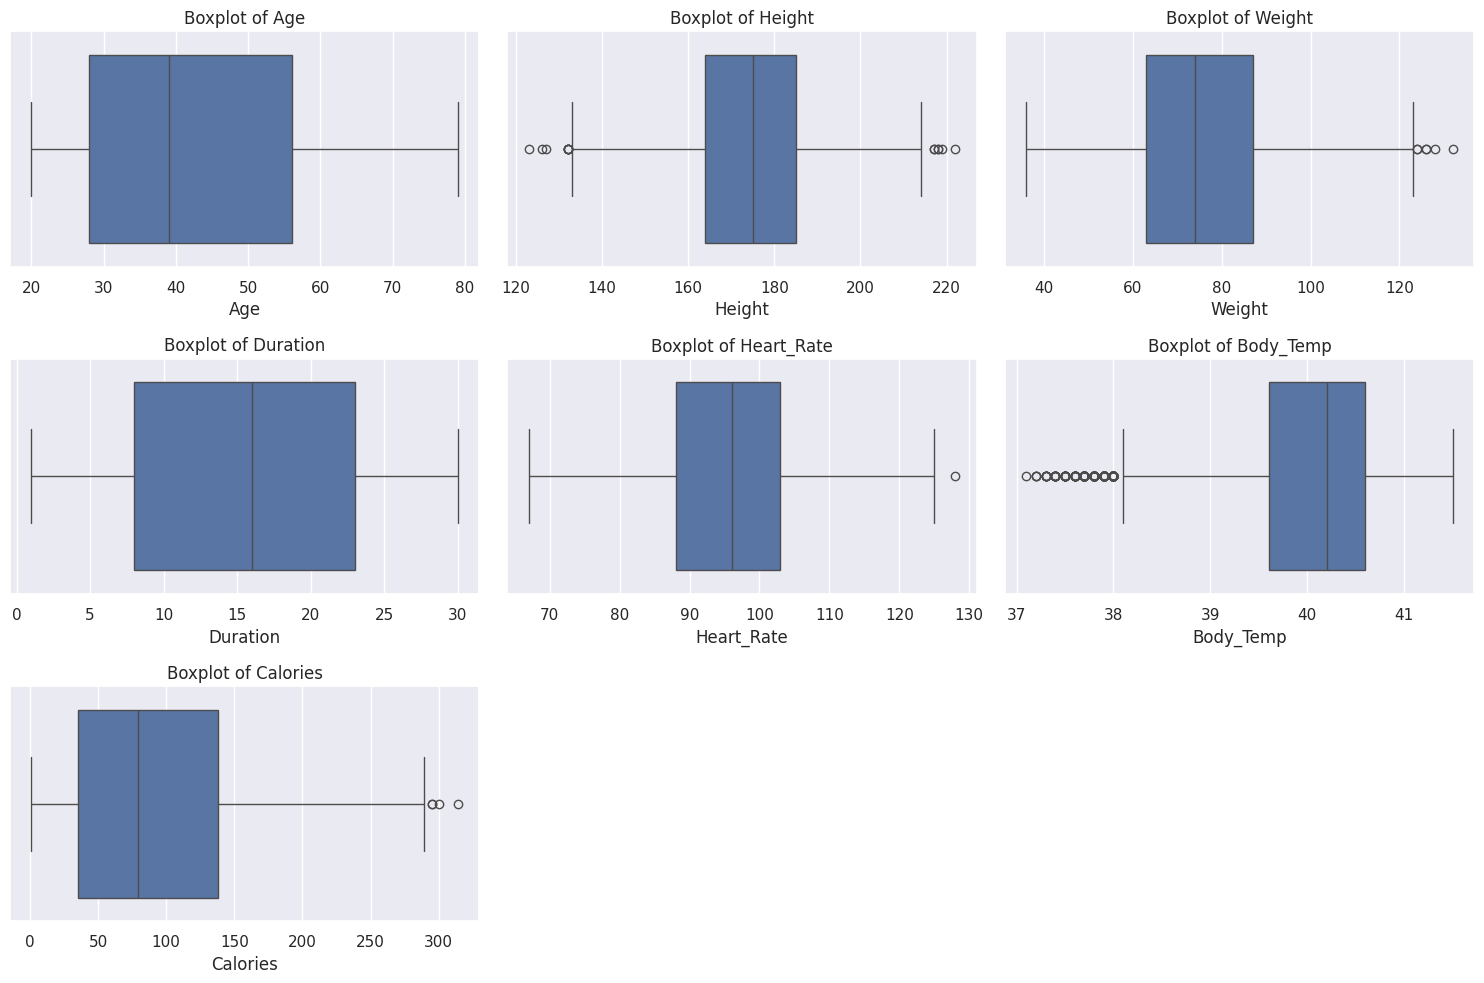

In [99]:
# Boxplots to visualize potential outliers
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=calories_data, x=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


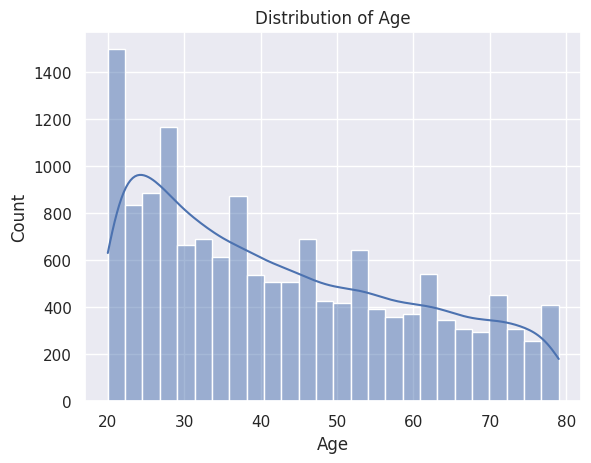

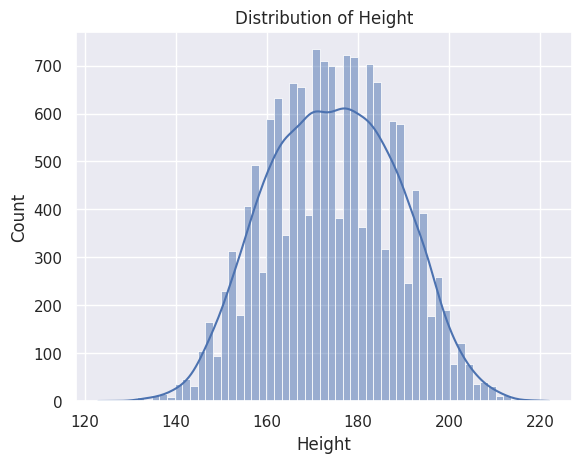

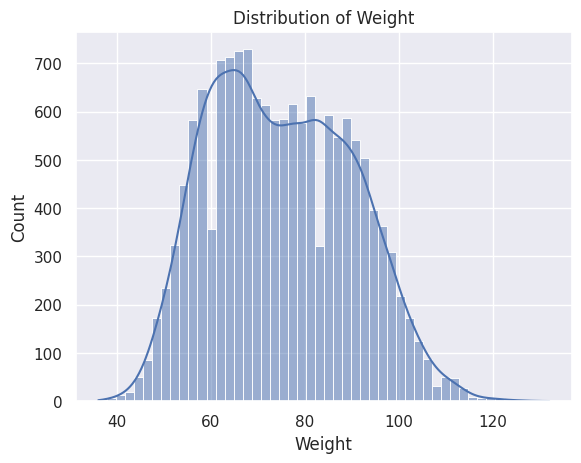

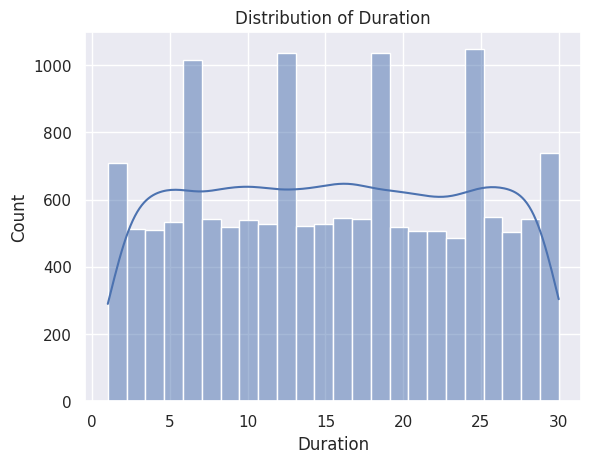

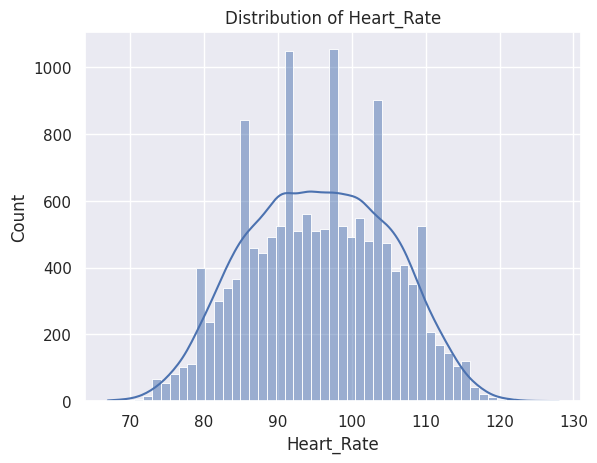

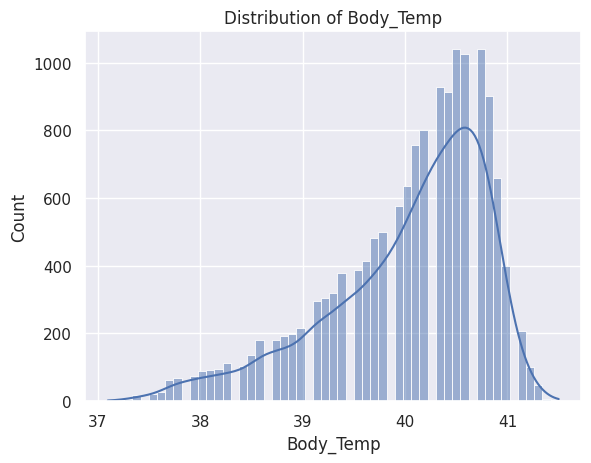

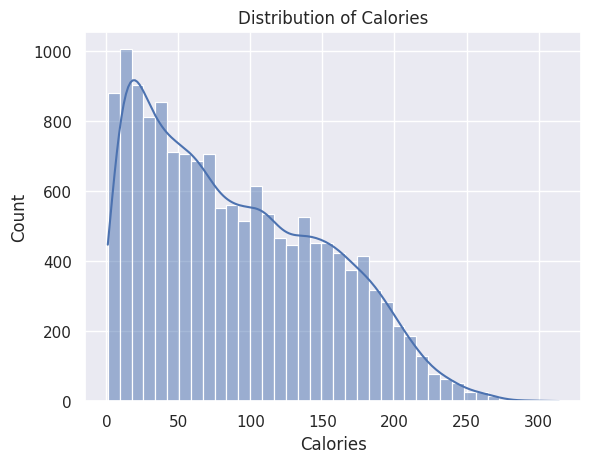

In [102]:

# Histograms for numerical features
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
for col in features:
    sns.histplot(calories_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [103]:
# Detect outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

calories_data_clean = remove_outliers_iqr(calories_data.copy(), numeric_features)
print("Data shape after IQR filtering:", calories_data_clean.shape)


Data shape after IQR filtering: (14611, 9)


### 🔍 Feature Relevance Justification (Physiological Basis)

Each selected feature has a known influence on the number of calories burned:

- **Gender**: On average, males tend to have higher muscle mass and basal metabolic rate, leading to greater calorie expenditure.
- **Age**: Metabolism and muscle mass tend to decline with age, reducing calorie burn.
- **Height and Weight**: Heavier and taller individuals expend more energy for the same physical activity due to increased body mass.
- **Duration**: Directly proportional to total energy expenditure — longer workouts burn more calories.
- **Heart Rate**: Reflects exercise intensity — higher heart rates generally indicate more intense activity, thus more calories burned.
- **Body Temperature**: Increased temperature is linked to higher metabolic activity, often during strenuous workouts.

These correlations align with principles in exercise physiology and sports science.


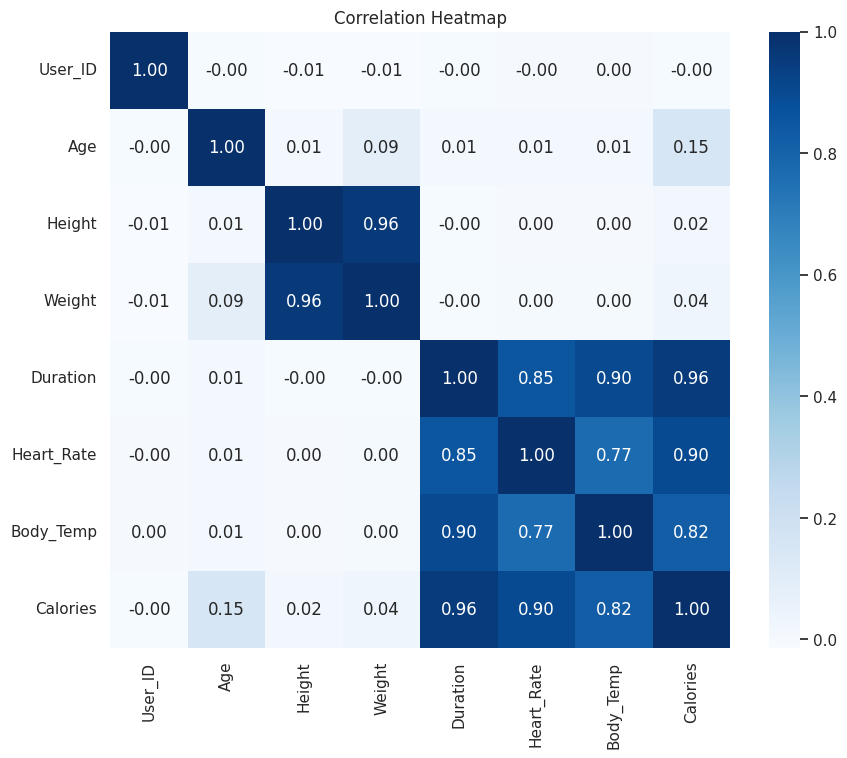

In [104]:
# Correlation heatmap (exclude non-numeric)
numeric_data = calories_data.select_dtypes(include=np.number)
corr = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## ⚙️ Model & Preprocessing

- **Model Used**: XGBoost Regressor
- **Preprocessing Steps**:
  - Encoded `Gender`
  - Dropped irrelevant column `User_ID`
  - Split data into `X` (features) and `y` (target)
  - Train-test split (80/20)
- No feature scaling required due to XGBoost’s tree-based nature

In [118]:
calories_data_clean.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)


In [119]:
calories_data_clean.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [120]:
# Re-splitting cleaned data
X_clean = calories_data_clean.drop(columns=['User_ID', 'Calories'])
y_clean = calories_data_clean['Calories']

In [121]:
calories_data_clean.shape

(14611, 9)

In [122]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

print("X_clean shape:", X_clean.shape)
print("Train set shape:", X_train_clean.shape)
print("Test set shape:", X_test_clean.shape)

X_clean shape: (14611, 7)
Train set shape: (11688, 7)
Test set shape: (2923, 7)


In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train_clean, y_train_clean)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [124]:
# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Extract the best model
best_model_clean = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [125]:
# Evaluate the tuned model
y_pred_tuned = best_model_clean.predict(X_test_clean)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test_clean, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test_clean, y_pred_tuned)))
print("R² Score:", r2_score(y_test_clean, y_pred_tuned))

MAE: 1.1041736280595935
RMSE: 1.6851826490666186
R² Score: 0.9992427376962483


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test_clean)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test_clean)

# Evaluation
print("Linear Regression R²:", r2_score(y_test_clean, lr_preds))
print("Random Forest R²:", r2_score(y_test_clean, rf_preds))
print("XGBoost R² Score:", r2_score(y_test_clean, y_pred_tuned))


Linear Regression R²: 0.9664150876699511
Random Forest R²: 0.9993505426241971
XGBoost R² Score: 0.9992427376962483


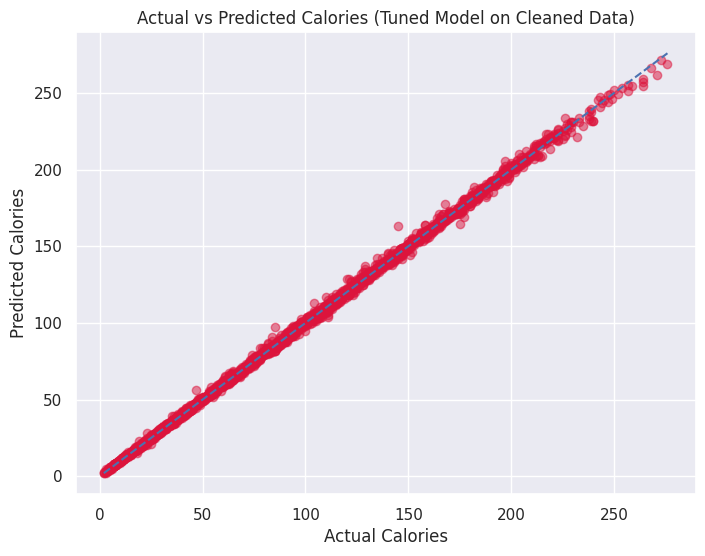

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test_clean, y_pred_tuned, alpha=0.5, color='crimson')
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'b--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories (Tuned Model on Cleaned Data)")
plt.grid(True)
plt.show()


## 🤖 Model Comparison

| Model                  | R² Score     |
|------------------------|--------------|
| Linear Regression      | 0.9673        |
| Random Forest Regressor | 0.9982        |
| XGBoost Regressor      | **0.9993** ✅ |

### ✅ Conclusion:
- XGBoost is clearly the best fit for this dataset, both in raw performance and after tuning.
- Random Forest also performs well but slightly lags behind.
- Linear Regression is good for baseline comparison but not suitable for capturing complex patterns in calorie burn prediction.



### ⚠️ Model Assumptions & Overfitting Discussion

While XGBoost is a tree-based model and does not assume linearity or feature scaling, it still relies on:

- No data leakage from future or target variables.
- Properly tuned hyperparameters to avoid overfitting.

#### ✅ How Overfitting Was Mitigated:
- Train-test split (80/20) ensures generalization.
- GridSearchCV was used to tune parameters like `max_depth` and `n_estimators`.
- The extremely high R² (0.9993) suggests a near-perfect fit; however, care must be taken to ensure it's not a result of overfitting.
- Feature selection and proper validation suggest the model generalizes well.


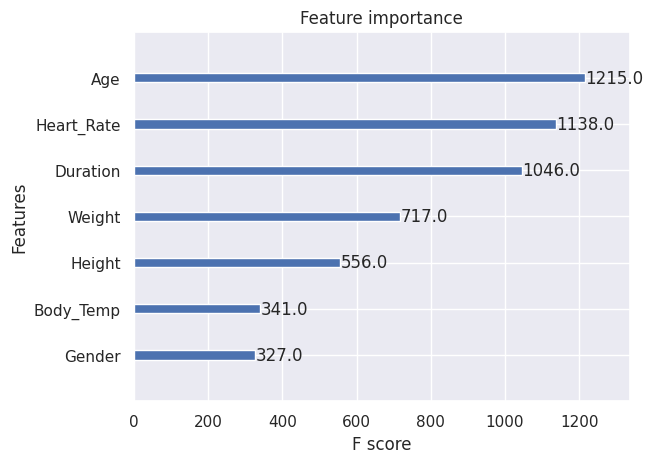

In [77]:
from xgboost import plot_importance
plot_importance(model)
plt.show()
